In [1]:
import os

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from IPython.display import Math, Latex
from matplotlib import figure
from ipywidgets import interact
from ipywidgets.embed import embed_minimal_html


import seaborn as sns

# for consistent results, set random seed
np.random.seed(42)

## 1. Eative, January 2021

In [2]:
# Canada
CA_converted = 150
CA_not_converted = 2081
sessions_CA = CA_converted + CA_not_converted

# UK
UK_converted = 425
UK_not_converted = 5821
sessions_UK = UK_converted + UK_not_converted

# US
US_converted = 1217
US_not_converted = 11735
sessions_US = US_converted + US_not_converted

# Total
sessions_total = sessions_CA + sessions_UK + sessions_US

#### Marginal probabilities

In [3]:
marginal_CA = round((sessions_CA / sessions_total), 4)
marginal_UK = round((sessions_UK / sessions_total), 4)
marginal_US = round((sessions_US / sessions_total), 4)

print(f'Marginal probability of CA, p(CA):\n {marginal_CA}')
print(f'Marginal probability of UK, p(UK):\n {marginal_UK}')
print(f'Marginal probability of US, p(US):\n {marginal_US}')

print(f'Sum of marginals: p(CA) + p(UK) + p(US):\n {marginal_CA + marginal_UK + marginal_US}')

Marginal probability of CA, p(CA):
 0.1041
Marginal probability of UK, p(UK):
 0.2915
Marginal probability of US, p(US):
 0.6044
Sum of marginals: p(CA) + p(UK) + p(US):
 1.0


#### Joint probabilities

In [4]:
conv_and_CA = round((CA_converted / sessions_total), 4)
non_conv_and_CA = round((CA_not_converted / sessions_total), 4)
conv_and_UK = round((UK_converted / sessions_total), 4)
non_conv_and_UK = round((UK_not_converted / sessions_total), 4)
conv_and_US = round((US_converted / sessions_total), 4)
non_conv_and_US = round((US_not_converted / sessions_total), 4)


print(f'Joint probability of conversion and CA, p(T, CA):\n {conv_and_CA}')
print(f'Joint probability of non-conversion and CA, p(F, CA):\n {non_conv_and_CA}')
print(f'Joint probability of conversion and UK, p(T, UK):\n {conv_and_UK}')
print(f'Joint probability of non-conversion and CA, p(F, UK):\n {non_conv_and_UK}')
print(f'Joint probability of conversion and US, p(T, US):\n {conv_and_US}')
print(f'Joint probability of non-conversion and US, p(F, US):\n {non_conv_and_US}')

print(f'Sum of joints:\n {conv_and_CA+non_conv_and_CA+conv_and_UK+non_conv_and_UK+conv_and_US+non_conv_and_US}')

Joint probability of conversion and CA, p(T, CA):
 0.007
Joint probability of non-conversion and CA, p(F, CA):
 0.0971
Joint probability of conversion and UK, p(T, UK):
 0.0198
Joint probability of non-conversion and CA, p(F, UK):
 0.2716
Joint probability of conversion and US, p(T, US):
 0.0568
Joint probability of non-conversion and US, p(F, US):
 0.5476
Sum of joints:
 0.9999


The more random variables, the more values approaching zero, as all together must sum up to 1. This can be a problem when dealing with complex probabilities, and it's known as the [Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality).

#### Conditional probabilities

In [5]:
conv_given_CA = round((conv_and_CA / marginal_CA), 4)
non_conv_given_CA = round((non_conv_and_CA / marginal_CA), 4)
conv_given_UK = round((conv_and_UK / marginal_UK), 4)
non_conv_given_UK = round((non_conv_and_UK / marginal_UK), 4)
conv_given_US = round((conv_and_US / marginal_US), 4)
non_conv_given_US = round((non_conv_and_US / marginal_US), 4)


print(f'Conditional probability of conversion given CA, p(T|CA):\n {conv_given_CA}')
print(f'Conditional probability of non-conversion given CA, p(F|CA):\n {non_conv_given_CA}')
print(f'Conditional probability of conversion given UK, p(T|UK):\n {conv_given_UK}')
print(f'Conditional probability of non-conversion given UK, p(F|UK):\n {non_conv_given_UK}')
print(f'Conditional probability of conversion given US, p(T|US):\n {conv_given_US}')
print(f'Conditional probability of non-conversion given US, p(F|US):\n {non_conv_given_US}')

Conditional probability of conversion given CA, p(T|CA):
 0.0672
Conditional probability of non-conversion given CA, p(F|CA):
 0.9328
Conditional probability of conversion given UK, p(T|UK):
 0.0679
Conditional probability of non-conversion given UK, p(F|UK):
 0.9317
Conditional probability of conversion given US, p(T|US):
 0.094
Conditional probability of non-conversion given US, p(F|US):
 0.906


## 2. Distributions

#### Uniform

In [6]:
from scipy.stats import uniform

# random numbers from uniform distribution (play with them!)
n = 10000
start = 10
width = 20
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

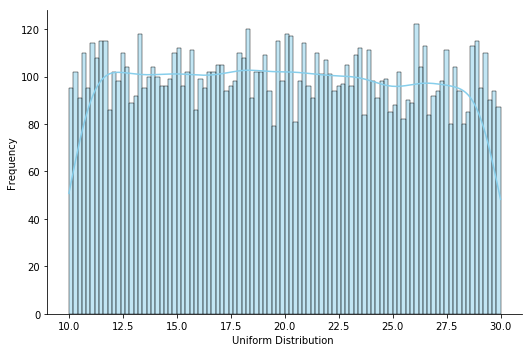

In [7]:
# draw distribution
ax = sns.displot(data_uniform,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 height=(5),
                 aspect=1.5)

ax.set(xlabel='Uniform Distribution ', ylabel='Frequency');

#### Bernoulli

In [8]:
from scipy.stats import bernoulli

# generate data
data_bern = bernoulli.rvs(size=10000,p=0.6)

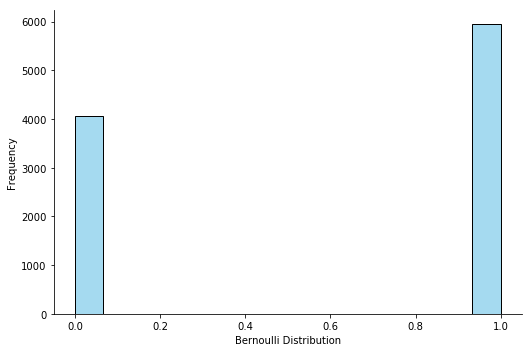

In [9]:
# draw distribution
ax= sns.displot(data_bern,
                 kde=False,
                 color="skyblue",
                 height=5,
                 aspect=1.5)

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency');

#### Normal, Gaussian

In [10]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,
                       loc=0, # mean of the distribution
                       scale=1) # standard deviation

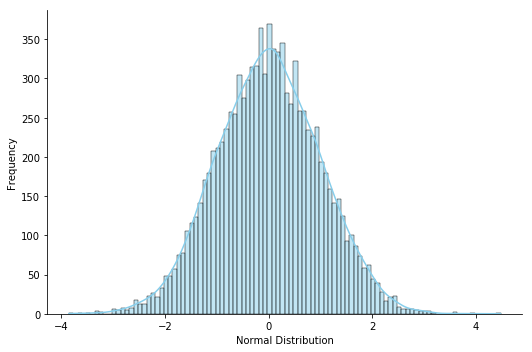

In [11]:
# draw distribution
ax = sns.displot(data_normal,
                 bins=100,
                 kde=True,
                 color='skyblue',
                 height=5,
                 aspect=1.5)

ax.set(xlabel='Normal Distribution', ylabel='Frequency');

#### Gamma

Rarely used in its raw form, exponential, chi-squared, erlang distributions are special cases of the gamma distribution.

In [12]:
from scipy.stats import gamma

# generate random data for gamma distribution
data_gamma = gamma.rvs(a=5, size=10000)

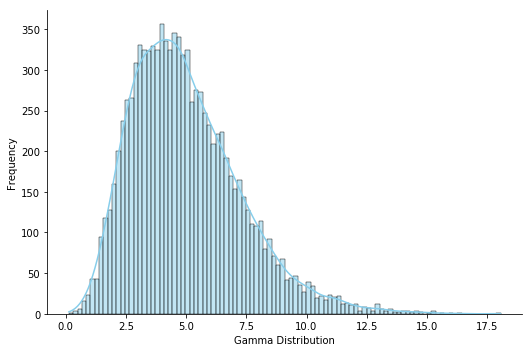

In [13]:
# draw distribution
ax = sns.displot(data_gamma,
                 kde=True,
                 bins=100,
                 color='skyblue',
                 height=5,
                 aspect=1.5)

ax.set(xlabel='Gamma Distribution', ylabel='Frequency');

#### Exponential

In [14]:
from scipy.stats import expon

# generate random values for exponential
data_expon = expon.rvs(scale=1,loc=0,size=1000)

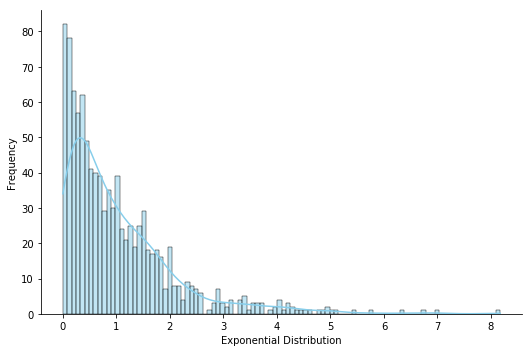

In [15]:
# draw
ax = sns.displot(data_expon,
                  kde=True,
                  bins=100,
                  color='skyblue',
                  height=5,
                  aspect=1.5)

ax.set(xlabel='Exponential Distribution', ylabel='Frequency');

#### Poisson

In [16]:
from scipy.stats import poisson

# gnerat data
data_poisson = poisson.rvs(mu=3, size=10000)

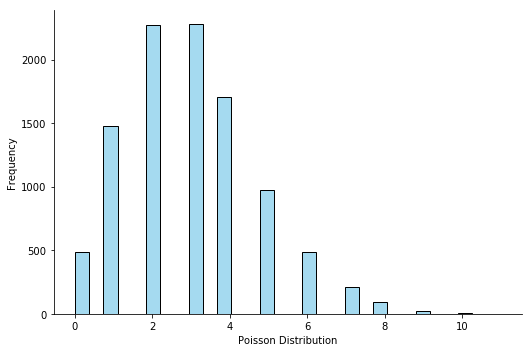

In [17]:
ax = sns.displot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  height=5,
                  aspect=1.5)

ax.set(xlabel='Poisson Distribution', ylabel='Frequency');

#### Binomial

In [18]:
from scipy.stats import binom

# generate data
data_binom = binom.rvs(n=10, p=0.8, size=10000)

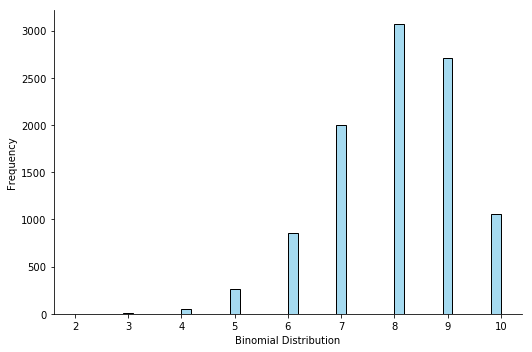

In [19]:
# draw distribution
ax = sns.displot(data_binom,
                  kde=False,
                  color='skyblue',
                  height=5,
                  aspect=1.5)

ax.set(xlabel='Binomial Distribution', ylabel='Frequency');

#### Dice rolls

In [23]:
# Generate random integers between 1 and 6 
n_simulations = 10000
x = np.random.randint(1, 7, n_simulations)

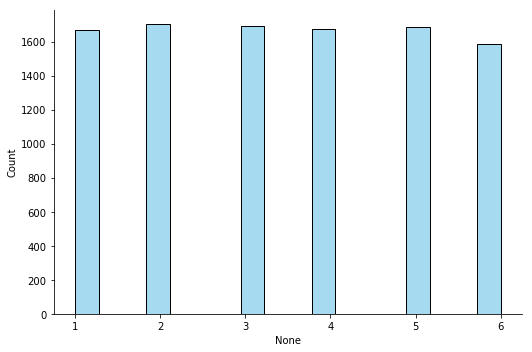

In [25]:
# draw distribution
sns.displot(x,
            kde=False,
            color='skyblue',
            height=5,
            aspect=1.5)
ax.set(xlabel='Distribution of Dice Rolls', ylabel='Count');

#### N-dice rolls

In [26]:
# one single dice 
def the_dice():
    return round(np.random.uniform(low = 0.5, high = 6.5, size = None), 0)


# n-dice 
def summing_dice(n):
    outcomes_array = np.zeros(n)
    for dice in range(0, n):
        outcomes_array[dice] = the_dice()
    return sum(outcomes_array)


# throws the set of n dice m times and stores the outcome
def the_rolling_of_dice(m, n):
    histo = np.zeros(m)
    for i in range(0,m):
        histo[i] = summing_dice(n)
    return histo


# histogram from the n trials of experimental data and normalisation to get probability distribution
def hand_made_histogram(sim_data, min_range, max_range):
    numberofInts = []
    for i in range(min_range, max_range+1):
        numberofsingeint = np.where(sim_data == i)[0]
        numberofInts.append(len(numberofsingeint))
    return [float(x)/sum(numberofInts) for x in numberofInts]


# return normalised histogram of the distribution of possible sums, the minimum possible and maximum possible sum
def from_random_var_to_data(n_trials, n_dice):
    sim_data = the_rolling_of_dice(n_trials, n_dice)
    min_range, max_range = n_dice, 6*n_dice
    HandMadeHist = hand_made_histogram(sim_data, min_range, max_range)
    return HandMadeHist,min_range,max_range

In [27]:
@interact
def n_dice_probability_distribution(num_of_dice = 5):
    HandMadeHist,min_range,max_range = from_random_var_to_data(100000, num_of_dice)
    df = pd.DataFrame(HandMadeHist,range(min_range,max_range+1), columns = ["probability"])
    sns.color_palette("Set2")
    sns.set(rc={'figure.figsize':(20,8)})
    ax = sns.scatterplot(x=range(min_range,max_range+1),y=HandMadeHist, palette = "Set2")
    ax.set(title = "Probability distribution for %s dice"%(num_of_dice), xlabel='Value', ylabel='probability')
    return plt.figure();

interactive(children=(IntSlider(value=5, description='num_of_dice', max=15, min=-5), Output()), _dom_classes=(…